# 1. Используя метод вычетов, сгенерировать последовательность из 1.000 псевдослучайных чисел, результат вывести на экран.

In [400]:
# метод вычетов для генерации псевдослучайных чисел
def residual_method(M, m, n):
    x = [None]*n
    a0 = (2**(-m))
    x[0] = (M * a0) % 1
    for i in range(1, len(x)):
        x[i] = (M * x[i-1]) % 1
    return x

In [401]:
N = 100
# Выбираем большое нечетное число M
M = 111455445111
# m = 31
m = 11

pseudo_rand_numbers = residual_method(M, m, N)
# pseudo_rand_numbers

График полученных псевдослучайных чисел

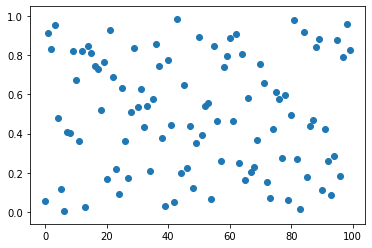

In [402]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter([x for x in range(N)], pseudo_rand_numbers)
plt.show()

### 1.1 Оценить математическое ожидание полученной последовательности, математическое ожидание и выборочную среднюю вывести на экран.

In [403]:
# Функция расчета выборочного среднего
def mo(pseudo_rand_numbers):
    m = 0
    for num in pseudo_rand_numbers:
        m += num 
    return m / len(pseudo_rand_numbers)

In [404]:
print("Математическое ожидание = ", 1/2)
print("Выборочная средняя = ", mo(pseudo_rand_numbers))

Математическое ожидание =  0.5
Выборочная средняя =  0.499453125


### 1.2 Оценить дисперсию полученной последовательности, дисперсию и выборочную дисперсию вывести на экран.

In [405]:
def vd(pseudo_rand_numbers):
    m = mo(pseudo_rand_numbers)
    d = 0
    for num in pseudo_rand_numbers:
        d += (num - m) ** 2
    return d / (len(pseudo_rand_numbers) - 1)

In [406]:
print("Дисперсия = ", 1/12)
print("Выборочная дисперсия = ", vd(pseudo_rand_numbers))

Дисперсия =  0.08333333333333333
Выборочная дисперсия =  0.08569707427361996


### 1.3 Построить частотную таблицу. Для L >= 10.

In [407]:
import numpy as np
import pandas as pd

def find_frequency(table, pseudo_rand_numbers, h):
    for i in range(len(table)):
        for num in pseudo_rand_numbers:
            if table[i][0]  <= num < table[i][1]:
                table[i][2] += 1
                table[i][3] += 1/N

In [408]:
# Количество интервалов
L = 20
# Шаг
h = 1/(L)


intervals = np.zeros((L, 4))

for i in range(L):
    intervals[i][0] = i*h
    intervals[i][1] = i*h + h

find_frequency(intervals, pseudo_rand_numbers, h)
table = pd.DataFrame(columns=['Интервал (x0)', 'Интервал (x1)', 'Кол-во СВ, попавших в интервал', "Относительная частота попадания"],
                    data=intervals)
table

,Интервал (x0),Интервал (x1),"Кол-во СВ, попавших в интервал",Относительная частота попадания
0,0.00,0.05,4.0,0.04
1,0.05,0.10,7.0,0.07
2,0.10,0.15,3.0,0.03
3,0.15,0.20,7.0,0.07
4,0.20,0.25,5.0,0.05
5,0.25,0.30,6.0,0.06
6,0.30,0.35,0.0,0.00
7,0.35,0.40,6.0,0.06
8,0.40,0.45,8.0,0.08
9,0.45,0.50,5.0,0.05


### 1.4 Проверить гипотезу о законе распределения методом гистограмм, построить гистограмму, вывести ее на экран.

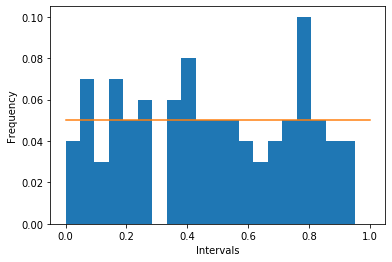

In [409]:
plt.hist(table['Интервал (x0)'], bins=L, weights=table['Относительная частота попадания'])
plt.plot([1/L]*2)
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

# 2 Смоделировать дискретную случайную величину, заданную таблицей , результат вывести на экран.

| xi | 1 | 4 | 12 | 16 | 25 | 33 | 37 |
|----|---|---|----|----|----|----|----|
| pi | 0.05|0.25|0.25|0.15|0.13|0.1|0.07|

In [410]:
table = [[1, 0.05], 
         [4, 0.25], 
         [12, 0.25],
         [16, 0.15],
         [25, 0.13],
         [33, 0.1],
         [37, 0.07]]
intervals = pd.DataFrame([[0, table[0][1],table[0][0]]], 
                         columns=['Interval(x0)', 'Interval(x1)', 'Value'])

temp = table[0][1]
# Разобьем интервал (0;1) точками из таблицы
for i in range(1, len(table)):
    intervals = intervals.append(pd.DataFrame(columns=intervals.columns, 
                              data=[[temp, temp + table[i][1], table[i][0]]]))
    temp += table[i][1]
    
intervals

,Interval(x0),Interval(x1),Value
0,0.00,0.05,1
0,0.05,0.30,4
0,0.30,0.55,12
0,0.55,0.70,16
0,0.70,0.83,25
0,0.83,0.93,33
0,0.93,1.00,37


In [ ]:
N = 1000
# Сгенерируем N случайных чисел
rand_numbers_numpy = np.random.uniform(0, 1, N)
rand_numbers = []

# Проверим, какому интервалу принадлежит каждое сгенерированное число
# и получим другое случайное число, по заданной таблицы распределения
for num in rand_numbers_numpy:
    for index, interval in intervals.iterrows():
        if interval['Interval(x0)'] <= num < interval['Interval(x1)']:
            rand_numbers.append(interval['Value'])
            continue
# print(rand_numbers)

plt.plot([x for x in range(N)], rand_numbers)
plt.show()

### 2.1 Оценить математическое ожидание полученной дискретной величины, результат вывести на экран.

In [412]:
# Найдем теоретическое математическое ожидание
def teor_mo(table):
    mo = 0
    for value, p in table:
        mo += value*p
    return mo

print("Теоретическое математическое ожидание = ", teor_mo(table))

Теоретическое математическое ожидание =  15.59


In [413]:
# Найдем математическое ожидание эксперементальное (оценка мат. ожидания)

print('Математическое ожидание, полученное в ходе эксперемента = ', mo(rand_numbers))

Математическое ожидание, полученное в ходе эксперемента =  15.827


### 2.2 Оценить дисперсию полученной дискретной случайной величины, результат вывести на экран.

In [414]:
# Найдем теоретическую дисперсию
def teor_disp(table):
    mo = teor_mo(table)
    mo_2 = teor_mo(list(map(lambda x: [x[0]**2, x[1]], table)))
    return mo_2 - mo**2

In [415]:
print('Дисперсия теоретическая = ', teor_disp(table))

Дисперсия теоретическая =  121.38190000000006


In [416]:
# Найдем дисперсию, полученную в ходе эксперимента (Оценку дисперсии)
print('Дисперсия, полученная в ходе эксперимента = ', vd(rand_numbers))

Дисперсия, полученная в ходе эксперимента =  121.44651751751667


### 2.3 Построить частотную таблицу, вывести ее на экран.

In [417]:
from collections import defaultdict

temp_dict = defaultdict(int)
for num in rand_numbers:
    temp_dict[num] += 1/len(rand_numbers)

freq_table = pd.DataFrame(data=list(temp_dict.items()), columns=['Number', 'Frequency'])
freq_table = freq_table.sort_values(by=['Number'])
freq_table

,Number,Frequency
0,1.0,0.053
3,4.0,0.238
5,12.0,0.240
1,16.0,0.159
2,25.0,0.139
4,33.0,0.101
6,37.0,0.070


### 2.4 Оценить закон распределения случайной величины по графику частоты появление ее значений в результате эксперементов.

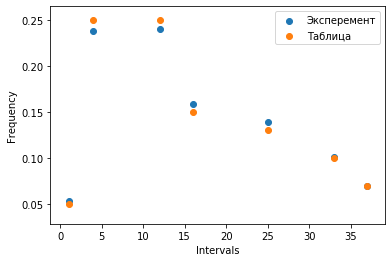

In [418]:
plt.scatter(freq_table['Number'], freq_table['Frequency'], label='Эксперемент')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.scatter([table[i][0] for i in range(len(table))], [table[i][1] for i in range(len(table))], label='Таблица')
plt.legend()
plt.show()

# 3. Смоделировать методом исключений непрерывную случайную величину с заданной плотностью распределения вероятности.

In [419]:
# Функция плотности распределения
def func_of_density(x):
    if x < 0 or x >= 8:
        return 0
    if x < 2:
        return x/8
    if x < 4:
        return (x-2)/8
    if x < 6:
        return (x-4)/8
    if x < 8:
        return (x-6)/8
    
# Функция плотности для нахождения интеграла для нахождения мат.ожидания
# f(x)*x


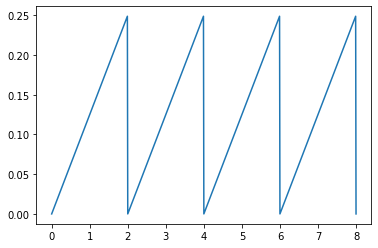

In [420]:
x = np.arange(0, 8.01, 1/100)
x_density = list(map(func_of_density, x))
plt.plot(x, x_density)
plt.show()

In [421]:
N = 100000
a, b = 0, 8
rand_numbers_3 = []
M = 0.25
while len(rand_numbers_3) < N:
    resid_M = np.random.randint(11111, 1111111111)
    if resid_M % 2 == 0:
        resid_M = resid_M + 1
    r1, r2 = residual_method(resid_M, m, 2)
    x0 = a + r1*(b-a)
    nu = r2*M
    if nu > func_of_density(x0):
        continue
    else:
        rand_numbers_3.append(x0)
# rand_numbers_3

### 3.1 - 3.2 Оценить математическое ожидание и дисперсию полученной непрерывной случайной величины, результат вывести на экран

In [422]:
from scipy import integrate

print("Оценка математического ожидания = ", mo(rand_numbers_3))

wait_mo = integrate.simps(x_density*x, x)
print("Ожидаемое математическое ожидание = ", wait_mo)

Оценка математического ожидания =  4.326197109375
Ожидаемое математическое ожидание =  4.316666666666666


In [423]:
print("Оценка дисперсии = ", vd(rand_numbers_3))

# Найдем ожидаемую дисперсию по формуле:
# D = integral(f(x)*x^2)(a, b) - integral^2(f(x)*x)(a,b)
disp = integrate.simps(x_density*x*x, x) - wait_mo**2
print("Ожидаемая дисперсия = ", disp)

Оценка дисперсии =  5.248618049203175
Ожидаемая дисперсия =  5.266388888888894


### 3.3 Построить частотную таблицу, вывести ее на экран 

In [502]:
L = 100
h = (b-a)/L
x0 = a
temp_dict = defaultdict(int)
l = len(rand_numbers_3)
for _ in range(L):
    x1 = x0 + h
    temp_dict[(x0, x1)] = 0
    for num in rand_numbers_3:
        if x0 < num < x1:
            temp_dict[(x0, x1)] += 1/l
    x0 = x1
    
frequenty_table = pd.DataFrame(columns=['x0', 'x1', 'freq'], 
                               data=[[x[0], x[1], freq] for x, freq in temp_dict.items()])
frequenty_table

,x0,x1,freq
0,0.00,0.08,0.00408
1,0.08,0.16,0.00000
2,0.16,0.24,0.00195
3,0.24,0.32,0.00418
4,0.32,0.40,0.00205
...,...,...,...
95,7.60,7.68,0.01601
96,7.68,7.76,0.01628
97,7.76,7.84,0.01896
98,7.84,7.92,0.01926


### 3.4 Проверить гипотезу о законе распределения методом гистограмм, построить и вывести на экран гистограмму

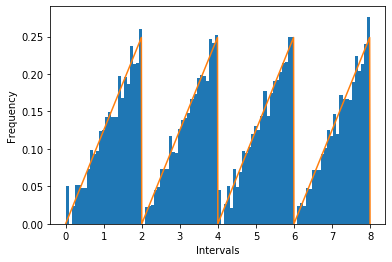

In [504]:
# plt.hist(frequenty_table['x0'], bins=L, width=frequenty_table['freq'])
plt.hist(rand_numbers_3, bins=L, density=1)
plt.plot(x, [x for x in x_density])
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()